In [1]:
import pandas as pd
import random
from faker import Faker
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

# Create mockup data for the app

In [2]:
faker = Faker()

In [3]:
# Initialize Faker instances per locale
faker_locales = {
    "Portugal": Faker("pt_PT"),
    "Andorra": Faker("es_ES"),
    "Spain": Faker("es_ES"),
    "France": Faker("fr_FR"),
    "Germany": Faker("de_DE"),
    "Austria": Faker("de_DE"),
    "Italy": Faker("it_IT"),
    "Belgium": Faker("fr_BE"),
    "Netherlands": Faker("nl_NL"),
    "Poland": Faker("pl_PL"),
    "Denmark": Faker("da_DK"),
    "Czech Republic": Faker("cs_CZ"),
    "Luxembourg": Faker("fr_BE"),
    "Switzerland": Faker("de_DE"),
    "Liechtenstein": Faker("de_DE"),
    "San Marino": Faker("it_IT"),
    "Monaco": Faker("fr_FR"),
}

# Given data
cities = {
    "Portugal": [
        ("Porto", 41.1496, -8.6109),
        ("Lisbon", 38.7169, -9.1399),
        ("Setúbal", 38.5243, -8.8926),
        ("Aveiro", 40.6405, -8.6538),
        ("Miranda do Douro", 41.4969, -6.2732),
        ("Faro", 37.0194, -7.9302),
        ("Moura", 38.1401, -7.4486),
        ("Vila Real", 41.2956, -7.7464),
    ],
    "Andorra": [("Andorra la Vella", 42.5078, 1.5211)],
    "Spain": [
        ("Aranda de Duero", 41.6696, -3.6892),
        ("Valladolid", 41.6523, -4.7236),
        ("Zaragoza", 41.6488, -0.8891),
        ("Burgos", 42.3439, -3.6969),
        ("Albacete", 38.9943, -1.8585),
        ("León", 42.5987, -5.5671),
        ("Motril", 36.7420, -3.5179),
        ("Bilbao", 43.2630, -2.9350),
        ("Vigo", 42.2406, -8.7207),
        ("Pamplona", 42.8125, -1.6458),
        ("Talavera de la Reina", 39.9596, -4.8308),
        ("Guadalajara", 40.6292, -3.1614),
    ],
    "France": [
        ("Metz", 49.1193, 6.1757),
        ("Lille", 50.6292, 3.0573),
        ("Lyon", 45.764, 4.8357),
        ("Rouen", 49.4432, 1.0999),
        ("Strasbourg", 48.5734, 7.7521),
        ("Nancy", 48.6921, 6.1844),
        ("Dijon", 47.322, 5.0415),
        ("Reims", 49.2583, 4.0317),
        ("Toulouse", 43.6045, 1.4442),
        ("Bordeaux", 44.8378, -0.5792),
        ("Nice", 43.7102, 7.2620),
        ("Rennes", 48.1173, -1.6778),
        ("Brest", 48.3904, -4.4861),
        ("Tours", 47.3941, 0.6848),
        ("Melun", 48.5459, 2.6458),
        ("Nanterre", 48.8924, 2.2153),
        ("Savigny sur Orge", 48.6797, 2.3500),
        ("Bergerac", 44.8562, 0.4819),
        ("Valence", 44.9333, 4.8924),
        ("Saint-Étienne", 45.4397, 4.3872),
    ],
    "Germany": [
        ("Essen", 51.4556, 7.0116),
        ("Dortmund", 51.5136, 7.4653),
        ("Stuttgart", 48.7758, 9.1829),
        ("Leipzig", 51.3397, 12.3731),
        ("Mannheim", 49.4875, 8.466),
        ("Bremen", 53.0793, 8.8017),
        ("Düsseldorf", 51.2277, 6.7735),
        ("Köln", 50.9375, 6.9603),
        ("Berlin", 52.5200, 13.4050),
        ("Freiburg", 47.9990, 7.8421),
        ("Augsburg", 48.3705, 10.8978),
        ("Münster", 51.9607, 7.6261),
        ("Ulm", 48.4000, 9.9833),
        ("Würzburg", 49.7913, 9.9534),
        ("Constance", 47.6603, 9.1758),
        ("Erfurt", 50.9787, 11.0328),
    ],
    "Austria": [
        ("Salzburg", 47.8095, 13.0550),
        ("Graz", 47.0707, 15.4395),
        ("Linz", 48.3069, 14.2858),
    ],
    "Italy": [
        ("Turin", 45.0703, 7.6869),
        ("Genoa", 44.4056, 8.9463),
        ("Brescia", 45.5416, 10.2118),
        ("Bologna", 44.4949, 11.3426),
        ("Verona", 45.4384, 10.9916),
        ("Padua", 45.4064, 11.8779),
        ("Parma", 44.8015, 10.3279),
        ("Modena", 44.6471, 10.9252),
        ("Reggio de Calabre", 38.1112, 15.6473),
        ("Catanzaro", 38.9108, 16.5874),
        ("Caserta", 41.0822, 14.3346),
        ("Pescara", 42.4618, 14.2139),
        ("Ciampino", 41.4598, 12.8461),
        ("Foggia", 41.4623, 15.5446),
    ],
    "Belgium": [
        ("Charleroi", 50.4114, 4.4445),
        ("Liège", 50.6326, 5.5797),
        ("Antwerp", 51.2194, 4.4025),
        ("Ghent", 51.0543, 3.7174),
    ],
    "Netherlands": [
        ("Eindhoven", 51.4416, 5.4697),
        ("Rotterdam", 51.9225, 4.4792),
        ("Utrecht", 52.0907, 5.1214),
    ],
    "Poland": [
        ("Wrocław", 51.1079, 17.0385),
        ("Katowice", 50.2707, 19.0399),
        ("Lodz", 51.7592, 19.4550),
        ("Chojnice", 53.6956, 17.5573),
        ("Legnica", 51.2076, 16.1589),
    ],
    "Switzerland": [
        ("Winterthur", 47.4999, 8.7266),
        ("Bern", 46.9480, 7.4474),
    ],
    "Denmark": [("Aarhus", 56.1629, 10.2039)],
    "Czech Republic": [("Brno", 49.1951, 16.6068)],
    "Luxembourg": [("Esch-sur-Alzette", 49.4958, 5.9804)],
    "Liechtenstein": [("Schaan", 47.1650, 9.5087)],
    "San Marino": [("Borgo Maggiore", 43.9415, 12.4474)],
    "Monaco": [("Monaco", 43.7384, 7.4246)],
}

# Generate data
customers = []
id = 1
for country, city_list in cities.items():
    faker_instance = faker_locales[country]
    for city, lat, lon in city_list:
        customers.append(
            {
                "id": id,
                "country": country,
                "city": city,
                "latitude": lat,
                "longitude": lon,
                "company_name": f"{id} - {faker_instance.company()}",
                "yearly_orders": int(50 + (np.random.uniform(0, 1) ** 0.5) * 300),
            }
        )
        id += 1

# Convert to DataFrame
df_customers = pd.DataFrame(customers)
df_customers = df_customers.sort_values(by="yearly_orders")

# Show sample
df_customers.sample(10)

,id,country,city,latitude,longitude,company_name,yearly_orders
23,24,France,Lyon,45.7640,4.8357,24 - Girard,114
61,62,Italy,Genoa,44.4056,8.9463,"62 - Bertoni, Pellico e Bettin Group",148
72,73,Italy,Ciampino,41.4598,12.8461,73 - Roccabonella-Finzi SPA,134
35,36,France,Melun,48.5459,2.6458,36 - Da Silva,309
54,55,Germany,Würzburg,49.7913,9.9534,55 - Steinberg AG,269
58,59,Austria,Graz,47.0707,15.4395,59 - Reichmann,298
50,51,Germany,Freiburg,47.9990,7.8421,51 - Geisel,277
62,63,Italy,Brescia,45.5416,10.2118,"63 - Aloisio, Sraffa e Ceci s.r.l.",230
52,53,Germany,Münster,51.9607,7.6261,53 - Mende GmbH,268
34,35,France,Tours,47.3941,0.6848,35 - Bègue Munoz et Fils,190


In [4]:
gdf_customers = gpd.GeoDataFrame(
    df_customers,
    geometry=gpd.points_from_xy(df_customers.longitude, df_customers.latitude),
)

In [5]:
# Define warehouse cities (not in customers' list)
warehouse_cities = {
    "Portugal": [("Braga", 41.5454, -8.4265), ("Coimbra", 40.2033, -8.4103)],
    "Spain": [
        ("Logroño", 42.4627, -2.4444),
        ("Salamanca", 40.9701, -5.6635),
        ("Toledo", 39.8628, -4.0273),
    ],
    "France": [
        ("Grenoble", 45.1885, 5.7245),
        ("Caen", 49.1829, -0.3707),
        ("Perpignan", 42.6973, 2.8956),
        ("Nantes", 47.2184, -1.5536),
        ("Clermont-Ferrand", 45.7772, 3.0870),
    ],
    "Germany": [
        ("Hanover", 52.3759, 9.7320),
        ("Dresden", 51.0504, 13.7373),
        ("Karlsruhe", 49.0069, 8.4037),
        ("Kiel", 54.3233, 10.1394),
        ("Nuremberg", 49.4521, 11.0767),
        ("Magdeburg", 52.1317, 11.6399),
    ],
    "Italy": [
        ("Florence", 43.7696, 11.2558),
        ("Bari", 41.1171, 16.8719),
        ("Taranto", 40.4643, 17.2470),
    ],
    "Poland": [("Gdańsk", 54.352, 18.6466)],
}

# Generate warehouses
warehouses = []
warehouse_index = 1
for country, city_list in warehouse_cities.items():
    for city, lat, lon in city_list:
        warehouses.append(
            {
                "warehouse": f"Warehouse {warehouse_index}",
                "country": country,
                "city": city,
                "latitude": lat,
                "longitude": lon,
                "yearly_cost": random.randint(800_000, 2_500_000),
                "yearly_co2_tons": random.randint(300, 800),
            }
        )
        warehouse_index += 1

# Convert to DataFrame
df_warehouses = pd.DataFrame(warehouses)
df_warehouses = df_warehouses.sort_values(by="yearly_cost")

df_warehouses.head()

,warehouse,country,city,latitude,longitude,yearly_cost,yearly_co2_tons
2,Warehouse 3,Spain,Logroño,42.4627,-2.4444,850071,441
9,Warehouse 10,France,Clermont-Ferrand,45.7772,3.0870,901430,568
10,Warehouse 11,Germany,Hanover,52.3759,9.7320,1003279,531
17,Warehouse 18,Italy,Bari,41.1171,16.8719,1022038,528
0,Warehouse 1,Portugal,Braga,41.5454,-8.4265,1146105,336


In [6]:
gdf_warehouses = gpd.GeoDataFrame(
    df_warehouses,
    geometry=gpd.points_from_xy(df_warehouses.longitude, df_warehouses.latitude),
)

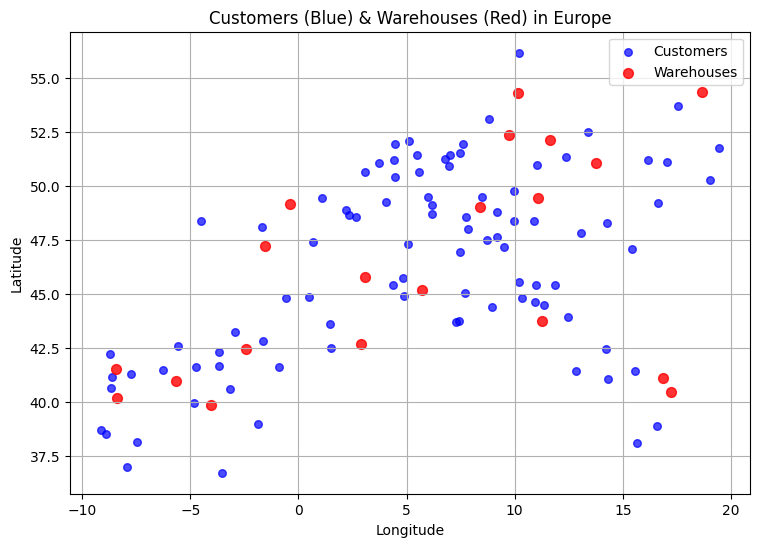

In [7]:
# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot customers and warehouses
gdf_customers.plot(ax=ax, color="blue", markersize=30, label="Customers", alpha=0.7)
gdf_warehouses.plot(ax=ax, color="red", markersize=50, label="Warehouses", alpha=0.8)

# Formatting
plt.legend()
plt.title("Customers (Blue) & Warehouses (Red) in Europe")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

In [8]:
def plot_customers_warehouses(df_customers, df_warehouses):

    df_customers["type"] = "Customer"
    df_warehouses["type"] = "Warehouse"
    data = pd.concat([df_customers, df_warehouses])

    data["hover_amount"] = data.apply(
        lambda row: (
            f"Yearly Orders: {row['yearly_orders']}"
            if row["type"] == "Customer"
            else f"Yearly Rent: {row['yearly_cost']:,.0f} €"
        ),
        axis=1,
    )
    data["hover_name"] = data.apply(
        lambda row: (
            f"Company Name: {row['company_name']}"
            if row["type"] == "Customer"
            else f"Warehouse {row['warehouse']}"
        ),
        axis=1,
    )
    # Different marker size for Warehouses and customers
    data["size"] = data["type"].map({"Customer": 5, "Warehouse": 22})

    # Create the map
    fig = px.scatter_mapbox(
        data,
        lat="latitude",
        lon="longitude",
        color="type",
        size="size",
        hover_name="hover_name",
        hover_data={
            "city": True,
            "hover_amount": True,
            "latitude": False,
            "longitude": False,
        },
        mapbox_style="carto-positron",
        zoom=3,
        center={"lat": 50, "lon": 10},  # Center on Europe
        size_max=10,
    )

    fig.update_traces(
        hovertemplate="<b>%{hovertext}</b><br>%{customdata[0]}<br>%{customdata[1]}<extra></extra>"
    )
    # Customize legend (inside map, white background)
    fig.update_layout(
        title="📍 Customers & Potential Warehouses",
        height=700,
        margin={"r": 0, "t": 50, "l": 0, "b": 0},
        legend=dict(
            x=0.02,
            y=0.98,  # Position: top-left inside the map
            bgcolor="rgba(255,255,255,0.8)",  # White semi-transparent background
            bordercolor="black",
            borderwidth=1,
        ),
    )

    return fig

In [9]:
plot_customers_warehouses(df_customers, df_warehouses)

In [10]:
df_customers = df_customers.drop(columns=["type"])
df_warehouses = df_warehouses.drop(columns=["type"])

In [11]:
df_customers.to_csv("./src/data/customers.csv", index=False)
df_warehouses.to_csv("./src/data/warehouses.csv", index=False)